## Juego de la vida
### John Llanes

### Introduccion

Se trata de un juego de cero jugadores, lo que quiere decir que su evolución está determinada por el estado inicial y no necesita ninguna entrada de datos posterior. El "tablero de juego" es una malla plana formada por cuadrados (las "células") que se extiende por el infinito en todas las direcciones. Por tanto, cada célula tiene 8 células "vecinas", que son las que están próximas a ella, incluidas las diagonales. Las células tienen dos estados: están "vivas" o "muertas" (o "encendidas" y "apagadas"). El estado de las células evoluciona a lo largo de unidades de tiempo discretas (se podría decir que por turnos). El estado de todas las células se tiene en cuenta para calcular el estado de las mismas al turno siguiente. Todas las células se actualizan simultáneamente en cada turno, siguiendo estas reglas:

    Una célula muerta con exactamente 3 células vecinas vivas "nace" (es decir, al turno siguiente estará viva).
    Una célula viva con 2 o 3 células vecinas vivas sigue viva, en otro caso muere (por "soledad" o "superpoblación").

![Alt Text](http://www.golhood.com/wp-content/uploads/2015/07/Reglas-GOL-1024x538.png)
![Alt Text](https://upload.wikimedia.org/wikipedia/commons/7/7e/GameOfLife_Glider_Animation.gif)

####  - Osciladores
Los osciladores son patrones que son predecesores de sí mismos. En otras palabras, son patrones que tras un número finito de generaciones vuelven a su estado inicial. El número de generaciones determina el período del oscilador. Se han descubierto osciladores de todos los períodos, pues hay reglas para generar osciladores de cualquier período deseado.
#### - Vidas estáticas
Las vidas estáticas son patrones que no cambian de una generación a la siguiente. Las vidas estáticas se puede considerar como osciladores de período 1. En general se asume que las vidas estáticas son finitas y no vacías. Se las puede dividir en vidas estáticas estrictas y pseudo vidas estáticas. Las vidas estáticas estrictas son aquellas cuyas partes no son estáticas por sí mismas.
#### - Naves espaciales
Las naves espaciales son patrones que reaparecen en otra posición tras completar su período. Esto es, son patrones que tras un número finito de generaciones vuelven a su estado original pero en una ubicación diferente. La velocidad de una nave es el número de celdas que se desplaza dividido por la longitud de su período.


![Alt Text](https://upload.wikimedia.org/wikipedia/commons/e/e5/Gospers_glider_gun.gif)
#### - Matusalenes
Los matusalenes son patrones que pueden evolucionar a lo largo de muchos turnos, o generaciones, antes de estabilizarse. El patrón Diehard desaparece después de 130 turnos, mientras que Acorn tarda 5206 turnos en estabilizarse en forma de muchos osciladores, y en ese tiempo genera 13 planeadores

### Librerias necesarias

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

### Creacion de la matriz

In [12]:
def exten(mat): 
    n = len(mat) 
    ex = np.zeros((n+2,n+2)) 
    ex[1:n+1,1:n+1] = mat 
    return ex

### Esta parte se ejecuta para ver la cantidad de los vecinos

In [13]:
def veci(i,j, ex): 
    return (ex[i,j-1] + ex[i,j+1] + ex[i-1,j-1] + (ex[i-1,j] + ex[i-1,j+1] + ex[i+1,j-1]) + (ex[i+1,j]+ ex[i+1,j+1]))

### Se crea las reglas para el juego de la vida

In [14]:
def reglas(mat): 
    n = len(mat) 
    ex = exten(mat) 
    nmat = np.zeros((n,n)) 
    for i in range(1,n+1): 
        for j in range(1,n+1): 
            s = veci(i,j,ex) 
            if s>3 or s <=1: 
                nmat[i-1,j-1] = 0 
            if s == 3 and mat[i-1,j-1]== 0: 
                nmat[i-1,j-1] = 1 
            if (s == 3 or s== 2) and mat[i-1,j-1]== 1: 
                nmat[i-1,j-1] = 1 
    return nmat

### Este método nos permite ejecutar las reglas un cierto número de veces

In [15]:
def correr(n,ini): 
    pasos = [] 
    pasos.append(ini) 
    g = ini 
    for i in range(n): 
        g = reglas(g) 
        pasos.append(g) 
    return pasos

### Creacion de una muestra

In [83]:
init = np.zeros((34,34)) 
init[3,4] = 1
init[3,5] = 1 
init[3,6] = 1 
init[3,7] = 1
init[4,3] = 1 
init[5,3] = 1 
init[6,3] = 1 
init[3,7] = 1 
init[4,7] = 1 
init[5,7] = 1 
init[6,7] = 1


### Se llama al método, por lo que realiza 5 interacciones a la matriz inicial.

In [84]:
res = correr(5, init)

### Tamaño de la Matriz

In [85]:
print (len(res[5]))

34


### Método que permite graficar una matriz.

In [86]:
def grafmat(mt): 
    n = len(mt) 
    dx = 1/n 
    pieces = [] 
    frame = patches.Rectangle( 
        (0.0, 0.0),1, 1, fill=False, edgecolor="white",linewidth=2) 
    pieces.append(frame) 
    for j in range(n): 
        for i in range(n): 
            if mt[i,j]== 1: 
                p = patches.Rectangle( 
                    (j/n,(n-1-i)/n), dx,dx, edgecolor="Blue", facecolor="black", fill=True, linewidth=2 )
                pieces.append(p) 
            if mt[i,j]== 0:
                p = patches.Rectangle( 
                    (j/n,(n-1-i)/n), dx,dx, edgecolor="Blue", fill=False,linewidth=2) 
                pieces.append(p) 
    return pieces


In [87]:
 def vermat(x): 
        ax1=plt.subplot(111,aspect='equal') 
        shape = grafmat(x) 
        for p in shape: ax1.add_patch(p) 
        plt.axis('off') 
        plt.show()


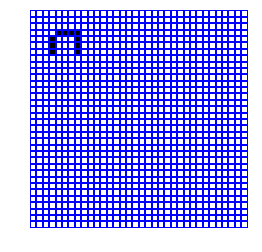

In [88]:
vermat (res[0])

In [89]:
def ver5(v,w,x, y, z): 
    fg = plt.figure(figsize=(20,4)) 
    adj = plt.subplots_adjust(hspace=0.4)
    
    ax0=plt.subplot(151,aspect='equal') 
    shape = grafmat(v) 
    for p in shape: ax0.add_patch(p) 
    plt.axis('off')
    
    ax1=plt.subplot(152,aspect='equal') 
    shape = grafmat(w) 
    for p in shape: ax1.add_patch(p) 
    plt.axis('off')
    
    ax2=plt.subplot(153,aspect='equal')  
    shape = grafmat(x) 
    for p in shape: ax2.add_patch(p) 
    plt.axis('off')
    
    ax3=plt.subplot(154,aspect='equal') 
    shape = grafmat(y) 
    for p in shape: ax3.add_patch(p) 
    plt.axis('off')
    
    ax4=plt.subplot(155,aspect='equal') 
    shape = grafmat(z) 
    for p in shape: ax4.add_patch(p) 
    plt.axis('off')
    plt.show()

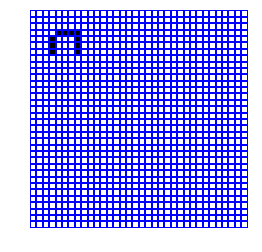

In [90]:
cor= correr(46, init)
vermat(init)

In [79]:
 def base(): 
        Base = np.zeros((34,34)) 
        Base[12,12] = 1 
        Base[12,16] = 1 
        Base[12,20] = 1 
        Base[16,12] = 1 
        Base[16,16] = 1 
        Base[16,20] = 1 
        Base[20,12] = 1 
        Base[20,16] = 1 
        Base[20,20] = 1 
        return Base


In [80]:
m6 = base() 
m6[16,13] = 1 
m6[16,14] = 1 
m6[16,15] = 1 
m6[16,17] = 1 
m6[16,18] = 1
m6[16,19] = 1 
m6[17,20] = 1 
m6[18,20] = 1 
m6[19,20] = 1

m7 = base() 
m7[12,13] = 1 
m7[12,14] = 1 
m7[12,15] = 1 
m7[13,12] = 1 
m7[14,12] = 1 
m7[15,12] = 1 
m7[17,12] = 1 
m7[18,12] = 1 
m7[19,12] = 1

m8 = base() 
m8[12,13] = 1 
m8[12,14] = 1 
m8[12,15] = 1 
m8[12,17] = 1 
m8[12,18] = 1 
m8[12,19] = 1 
m8[15,17] = 1 
m8[14,18] = 1 
m8[13,19] = 1

m9 = base() 
m9[19,13] = 1 
m9[18,14] = 1 
m9[17,15] = 1 
m9[15,17] = 1 
m9[14,18] = 1 
m9[13,19] = 1 
m9[13,20] = 1 
m9[14,20] = 1 
m9[15,20] = 1

m10 = base() 
m10[13,12] = 1 
m10[14,12] = 1 
m10[15,12] = 1 
m10[13,13] = 1 
m10[14,14] = 1 
m10[15,15] = 1 
m10[17,16] = 1 
m10[18,16] = 1 
m10[19,16] = 1

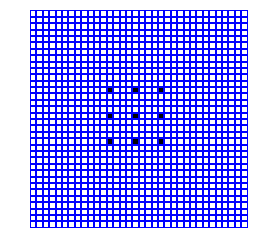

In [93]:
vermat (base())

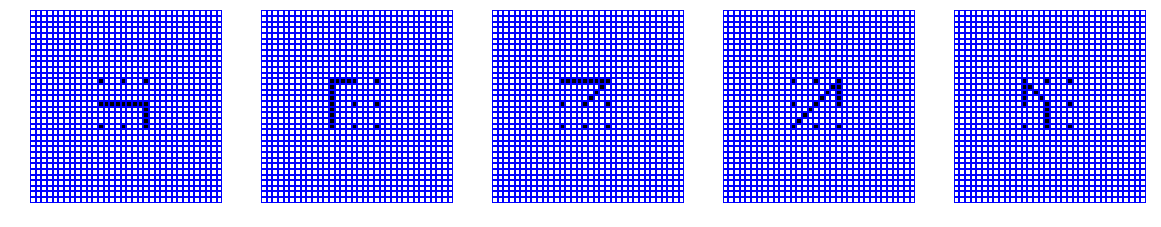

In [82]:
ver5 (m6,m7,m8,m9,m10)

Resultado


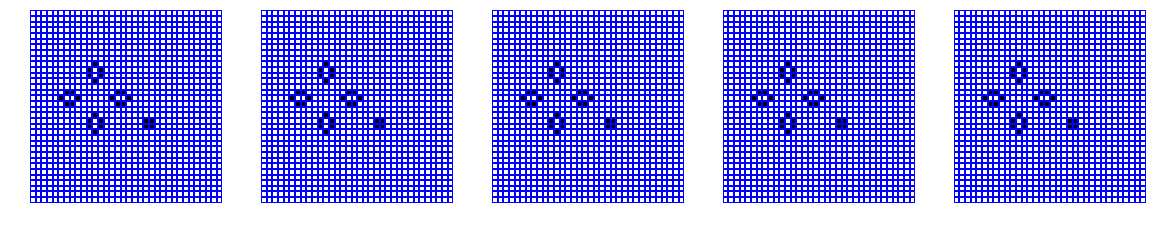

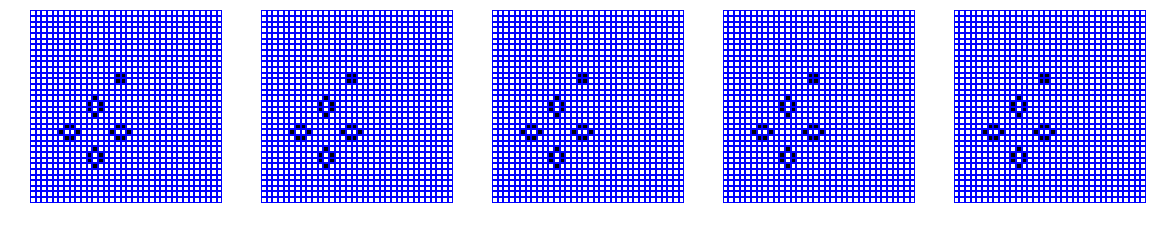

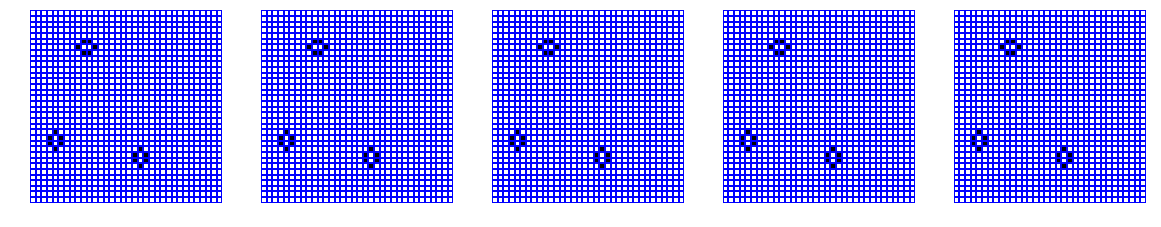

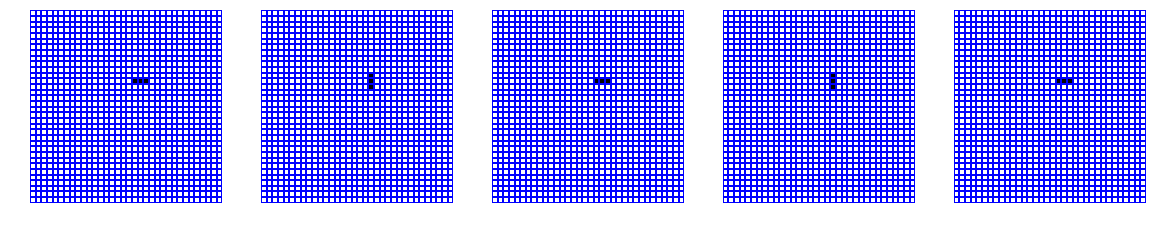

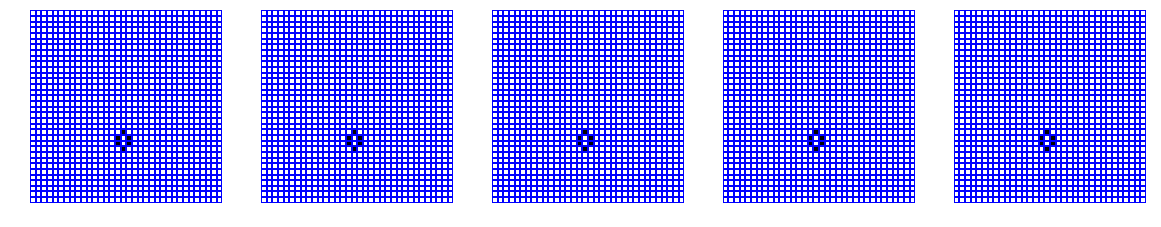

In [91]:
muestras = [m6,m7,m8,m9,m10] 
resultados = []
for m in muestras: 
    r = correr(300, m) 
    resultados.append(r)
    
print("Resultado") 
i = 1 
for r in resultados: 
    ver5 (r[len(r)-5],r[len(r)-4],r[len(r)-3],r[len(r)-2],r[len(r)-1]) 
                                                                                                                                        
    i = i + 1



Muestra  5


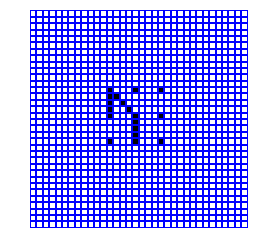

{1: 90, 2: 115, 3: 80, 4: 116, 5: 81, 6: 100, 7: 94, 8: 105, 9: 94, 10: 97, 11: 85, 12: 84, 13: 90, 14: 97, 15: 90, 16: 103, 17: 84, 18: 85, 19: 63, 20: 66, 21: 62, 22: 61, 23: 66, 24: 74, 25: 77, 26: 99, 27: 87, 28: 115, 29: 106, 30: 131, 31: 124, 32: 135, 33: 146, 34: 172, 35: 103, 36: 118, 37: 111, 38: 115, 39: 123, 40: 113, 41: 112, 42: 114, 43: 115, 44: 125, 45: 127, 46: 126, 47: 136, 48: 146, 49: 139, 50: 138, 51: 140, 52: 150, 53: 159, 54: 156, 55: 155, 56: 150, 57: 161, 58: 146, 59: 153, 60: 161, 61: 179, 62: 168, 63: 181, 64: 187, 65: 184, 66: 198, 67: 182, 68: 190, 69: 186, 70: 195, 71: 199, 72: 183, 73: 185, 74: 189, 75: 204, 76: 194, 77: 181, 78: 205, 79: 193, 80: 207, 81: 196, 82: 200, 83: 174, 84: 170, 85: 167, 86: 173, 87: 160, 88: 161, 89: 154, 90: 143, 91: 149, 92: 153, 93: 154, 94: 160, 95: 144, 96: 159, 97: 160, 98: 141, 99: 159, 100: 137, 101: 142, 102: 141, 103: 140, 104: 151, 105: 149, 106: 134, 107: 143, 108: 143, 109: 150, 110: 148, 111: 156, 112: 136, 113: 138,

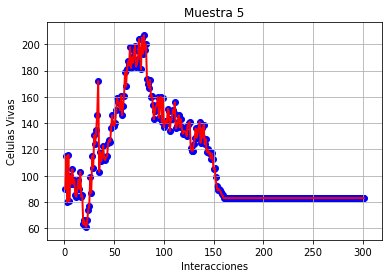

In [92]:
import simpy 
import random 
import matplotlib.pyplot as pp

dms={} 
dm={} 
j = 0 
for r in resultados:
    j = j + 1 
    i = 0
    for m in r: 
        i = i + 1 
        for fila in range(len(m)): 
            for columna in range(len(m)): 
                if m[fila][columna] == 1: 
                    if i in dm: 
                        dm[i]=dm[i]+1 
                    else: 
                        dm[i]=1
dms[5]=dm
dm={}

# Generamos la grafica 
for key, dicm in dms.items(): 
    print ("Muestra ", key) 
    vermat (muestras[key-1]) 
    print (dicm) 
    datos=sorted(dicm.items()) 
    x, y =zip(*datos) 
    pp.plot(x,y,linewidth=2,color='red') 
    pp.scatter(x,y,color='blue') 
    pp.grid(True) 
    pp.title("Muestra %s" %(key)) 
    pp.xlabel('Interacciones') 
    pp.ylabel('Celulas Vivas')
    pp.show()